In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.linear_model import orthogonal_mp as OMP
from sklearn.datasets import make_sparse_coded_signal
import scipy.fftpack as fft

In [2]:
# parameters
n = 60
m = 2*n
N = 500
bins = 20
NZ = np.linspace(1,bins,bins)

In [3]:
L2error = np.zeros(bins)
SupportError = np.zeros(bins)

A = np.concatenate((np.eye(n),fft.dct(np.eye(n))),axis=1) # identity and DCT
# A = np.random.randn(n,m)
A = A.dot(np.diag(np.sqrt(np.sum(A**2,axis=0))**(-1)) )
mu = np.max(np.abs(A.T.dot(A) - (A.T.dot(A)*np.eye(m))))

for i in range(bins):
    nnz = int(NZ[i])
    X = np.zeros((m,N))
    for j in range(N): # generating sparse vectors
        S = np.random.permutation(m)[0:nnz]
        X[S,j] = (2 + np.random.rand(nnz) ) * ( ((np.random.rand(nnz)<.5)*1.0)*2 -1)
    
    y = A.dot(X)
    X_hat = OMP(A, y, n_nonzero_coefs=nnz)
    L2error[i] = np.linalg.norm(np.abs(X-X_hat))/np.linalg.norm(X)
    nz = np.max([np.count_nonzero(X),np.count_nonzero(X_hat)])
    SupportError[i] = (nz -  np.sum(((X!=0)*1.0) * ((X_hat!=0)*1.0)))/nz

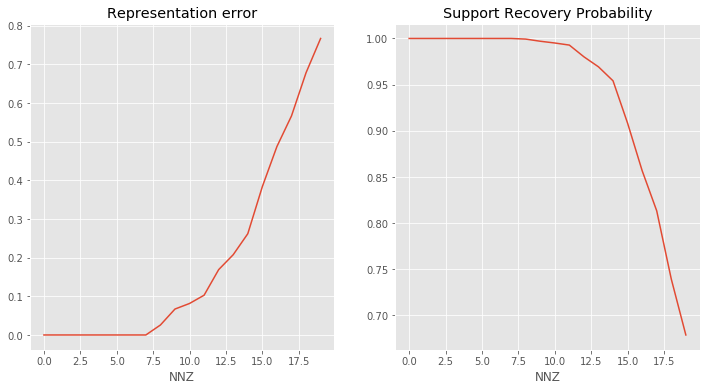

Mutual Coherence = 0.18
Recovery for 3.28 non-zeros


In [5]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(L2error)
plt.title('Representation error')
plt.xlabel('NNZ')

plt.subplot(1,2,2)
plt.plot(1-SupportError)
plt.title('Support Recovery Probability')
plt.xlabel('NNZ')

plt.show()

print("Mutual Coherence = %.2f"%mu)
allowed_nnz = .5*(1/.18+1)
print("Recovery for %.2f non-zeros"%allowed_nnz)